---
**Desafio 1: Plotar as médias, medianas e moda nas notas de LC e MT (procurar linha vertical no matplotlib) <br>
Desafio 2: Criar a matriz diagonal de correlação entre notas <br>
Desafio 3: Filtrar as notas do seu estado e refazer as análises da aula, verificando se são semelhantes ao geral. <br>
Desafio 4: O que causa a correlação de MT e LC?** <br>

---

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np

dados = pd.read_csv("https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true")

# **Tabela Geral**

In [ ]:
dados.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_TOTAL
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABB...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B,2288.9
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,1,1504208.0,Marabá,15.0,PA,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999ABCEBCEDDECEEEBBCCEECCABDABEEBCDEAEBBEAEA...,NaN,1,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,1.0,80.0,100.0,80.0,80.0,60.0,400.0,C,C,A,A,4,B,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,B,A,A,B,1184.6
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,1,1501402.0,Belém,15.0,PA,1,12,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999ECBCECEBBABECCCECECCEECCDECEEEDADDDDECEDD...,DDBEADEBBCADCEEACABECBCEBADECADCEDAACBDABABCE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,120.0,100.0,120.0,560.0,C,A,B,B,5,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B,2350.5
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,1,1505437.0,Ourilândia do Norte,15.0,PA,1,7,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999BABCDABBCBDDAAECADBDDADDCBCEEDCAEBCEAEABD...,CBDEBBCBDEBCABCDBDEDADCCBEDBCAECEBEBDEBAEECBC,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,100.0,120.0,120.0,120.0,40.0,500.0,E,C,A,A,1,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B,2555.7
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,1,1500800.0,Ananindeua,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EBCAB99999BBCECBCACBEACBDAABDBCBBDACEBBACDCAEC...,AECCBBCBBCBDEDECACBAABEDABBEDDADCEADDBEBDBBEB,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,160.0,140.0,160.0,160.0,160.0,780.0,E,E,B,D,3,E,A,B,C,B,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B,2803.5


In [ ]:
dados.shape

(127380, 136)

In [ ]:
dados.columns.values

array(['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'CO_MUNICIPIO_NASCIMENTO',
       'NO_MUNICIPIO_NASCIMENTO', 'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_ESCOLA', 'CO_MUNICIPIO_ESC',
       'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA',
       'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL',
       'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA',
       'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF', 'IN_GESTANTE',
       'IN_LACTANTE', 'IN_IDOSO', 'IN_ESTUDA_CLASSE_HOSPITALAR',
       'IN_SEM_RECURSO', 'IN_BRAILLE', 'IN_AMPLIADA_24

# **Variáveis e Funções**

In [363]:
provas = ["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_MT", "NU_NOTA_LC", "NU_NOTA_REDACAO"]
alunos_menor_quatorze = dados.query("NU_IDADE <= 14")
renda_ordenada = dados["Q006"].unique()
renda_ordenada.sort()
dados["NU_NOTA_TOTAL"] = dados[provas].sum(axis = 1)
provas.append("NU_NOTA_TOTAL")
dados_sem_notas_zero = dados.query("NU_NOTA_TOTAL != 0")
correlacao = dados_sem_notas_zero[provas].corr()
dados_sp = dados_sem_notas_zero.query("CO_UF_RESIDENCIA == 35")
provas_sp = dados_sem_notas_zero.query("CO_UF_RESIDENCIA == 35")[provas]
correlacao_sp = provas_sp.corr()
media_mt = float("{:.2f}".format(dados_sem_notas_zero["NU_NOTA_MT"].mean()))
mediana_mt = dados_sem_notas_zero["NU_NOTA_MT"].median()
moda_mt = dados_sem_notas_zero["NU_NOTA_MT"].median()
media_lc = float("{:.2f}".format(dados_sem_notas_zero["NU_NOTA_LC"].mean()))
mediana_lc = dados_sem_notas_zero["NU_NOTA_LC"].median()
moda_lc = dados_sem_notas_zero["NU_NOTA_LC"].median()

# **Desafio 1 - Plotar as médias, medianas e moda nas notas de LC e MT**

Text(600, 1500, '520.68')

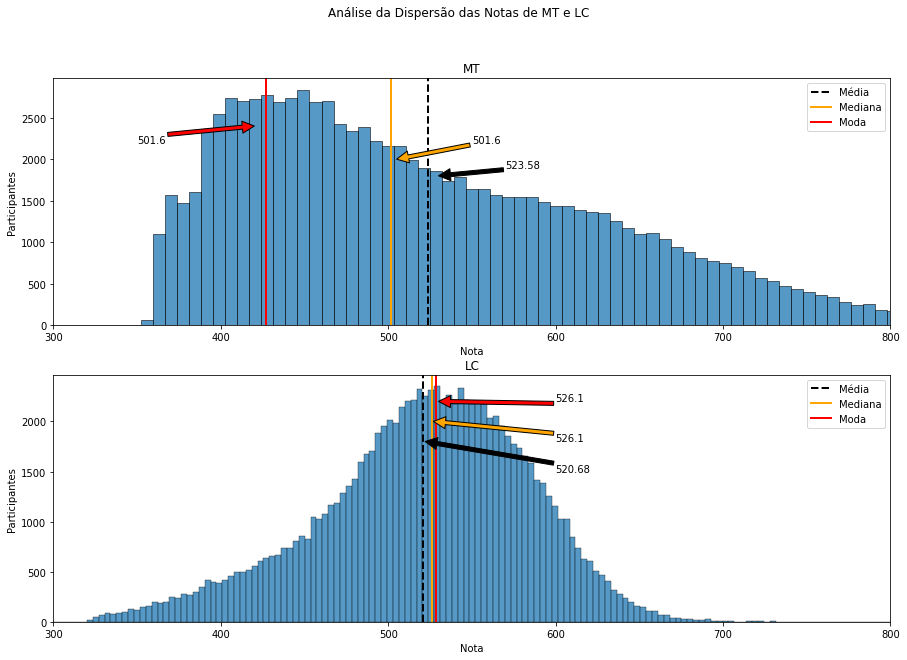

In [345]:
plt.figure(figsize=(15,10))
plt.suptitle("Análise da Dispersão das Notas de MT e LC")

plt.subplot(2,1,1)
sns.histplot(dados_sem_notas_zero, x = "NU_NOTA_MT")
plt.axvline(dados_sem_notas_zero["NU_NOTA_MT"].mean(), color='black', linestyle='dashed', linewidth=2)
plt.axvline(dados_sem_notas_zero["NU_NOTA_MT"].median(), color='orange', linewidth=2)
plt.axvline(dados_sem_notas_zero["NU_NOTA_MT"].mode()[0], color='red', linewidth=2)
plt.xlim((300, 800))
plt.ylabel("Participantes")
plt.xlabel("Nota")
plt.legend(['Média', 'Mediana', 'Moda'])
plt.title("MT")
plt.annotate(moda_mt, xy=(420, 2400), xytext=(350, 2200), arrowprops=dict(facecolor='red'))
plt.annotate(mediana_mt, xy=(505, 2000), xytext=(550, 2200), arrowprops=dict(facecolor='orange'))
plt.annotate(media_mt, xy=(530, 1800), xytext=(570, 1900), arrowprops=dict(facecolor='black'))

plt.subplot(2,1,2)
sns.histplot(dados_sem_notas_zero, x = "NU_NOTA_LC")
plt.axvline(dados_sem_notas_zero["NU_NOTA_LC"].mean(), color='black', linestyle='dashed', linewidth=2)
plt.axvline(dados_sem_notas_zero["NU_NOTA_LC"].median(), color='orange', linewidth=2)
plt.axvline(dados_sem_notas_zero["NU_NOTA_LC"].mode()[0], color='red', linewidth=2)
plt.xlim((300, 800))
plt.ylabel("Participantes")
plt.xlabel("Nota")
plt.legend(['Média', 'Mediana', 'Moda'])
plt.title("LC")
plt.annotate(moda_lc, xy=(530, 2200), xytext=(600, 2200), arrowprops=dict(facecolor='red'))
plt.annotate(mediana_lc, xy=(527, 2000), xytext=(600, 1800), arrowprops=dict(facecolor='orange'))
plt.annotate(media_lc, xy=(522, 1800), xytext=(600, 1500), arrowprops=dict(facecolor='black'))

# **Desafio 2 -  Criar a matriz diagonal de correlação entre notas**

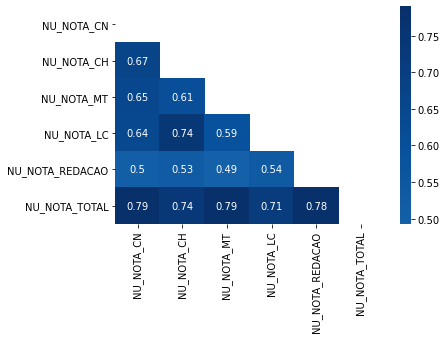

In [ ]:
mask = np.triu(np.ones_like(correlacao, dtype=int))
sns.heatmap(correlacao, mask=mask, cmap="Blues", center=0, annot=True)

# **Desafio 3 - Filtrar as notas do seu estado e refazer as análises da aula, verificando se são semelhantes ao geral.**

Text(0.5, 1.0, 'SP')

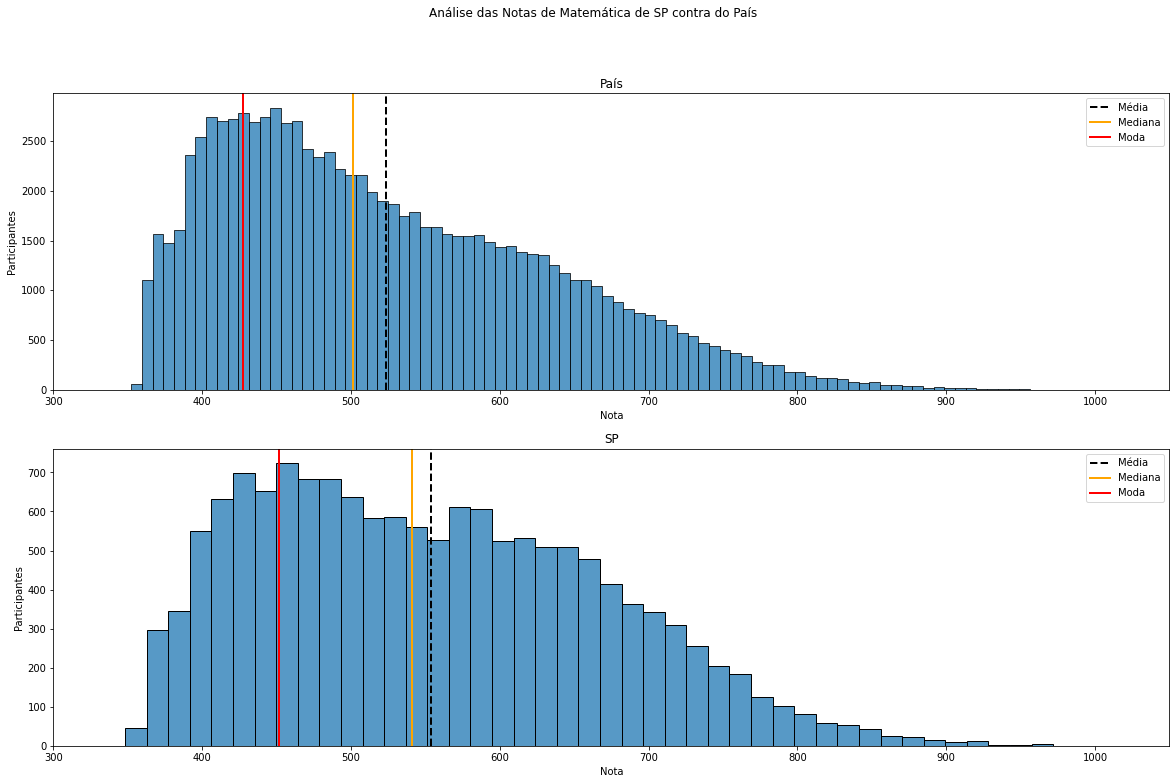

In [352]:
plt.figure(figsize=(20,12))
plt.suptitle("Análise das Notas de Matemática de SP contra do País")

plt.subplot(2,1,1)
sns.histplot(dados_sem_notas_zero, x = "NU_NOTA_MT")
plt.axvline(dados_sem_notas_zero["NU_NOTA_MT"].mean(), color='black', linestyle='dashed', linewidth=2)
plt.axvline(dados_sem_notas_zero["NU_NOTA_MT"].median(), color='orange', linewidth=2)
plt.axvline(dados_sem_notas_zero["NU_NOTA_MT"].mode()[0], color='red', linewidth=2)
plt.xlim((300, 1050))
plt.ylabel("Participantes")
plt.xlabel("Nota")
plt.legend(['Média', 'Mediana', 'Moda'])
plt.title("País")

plt.subplot(2,1,2)
sns.histplot(dados_sp, x = "NU_NOTA_MT")
plt.axvline(dados_sp["NU_NOTA_MT"].mean(), color='black', linestyle='dashed', linewidth=2)
plt.axvline(dados_sp["NU_NOTA_MT"].median(), color='orange', linewidth=2)
plt.axvline(dados_sp["NU_NOTA_MT"].mode()[0], color='red', linewidth=2)
plt.xlim((300, 1050))
plt.ylabel("Participantes")
plt.xlabel("Nota")
plt.legend(['Média', 'Mediana', 'Moda'])
plt.title("SP")


SP demonstra moda, mediana e média maiores que comparadas a todo o país. A mediana mais afastada da média no país mostra também que a concentração de notas altas é menor do que em SP, que tem média e mediana mais próximas.


Text(0.5, 1.0, 'SP')

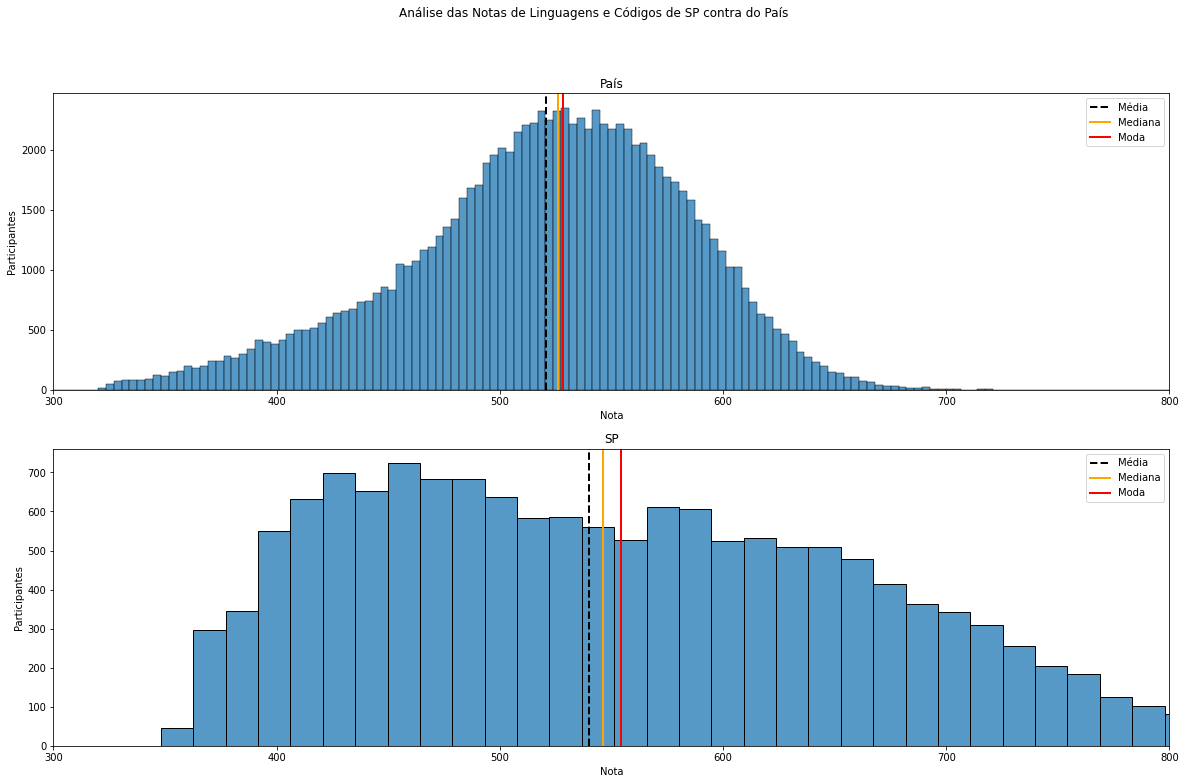

In [353]:
plt.figure(figsize=(20,12))
plt.suptitle("Análise das Notas de Linguagens e Códigos de SP contra do País")

plt.subplot(2,1,1)
sns.histplot(dados_sem_notas_zero, x = "NU_NOTA_LC")
plt.axvline(dados_sem_notas_zero["NU_NOTA_LC"].mean(), color='black', linestyle='dashed', linewidth=2)
plt.axvline(dados_sem_notas_zero["NU_NOTA_LC"].median(), color='orange', linewidth=2)
plt.axvline(dados_sem_notas_zero["NU_NOTA_LC"].mode()[0], color='red', linewidth=2)
plt.xlim((300,800))
plt.ylabel("Participantes")
plt.xlabel("Nota")
plt.legend(['Média', 'Mediana', 'Moda'])
plt.title("País")

plt.subplot(2,1,2)
sns.histplot(dados_sp, x = "NU_NOTA_MT")
plt.axvline(dados_sp["NU_NOTA_LC"].mean(), color='black', linestyle='dashed', linewidth=2)
plt.axvline(dados_sp["NU_NOTA_LC"].median(), color='orange', linewidth=2)
plt.axvline(dados_sp["NU_NOTA_LC"].mode()[0], color='red', linewidth=2)
plt.xlim((300, 800))
plt.ylabel("Participantes")
plt.xlabel("Nota")
plt.legend(['Média', 'Mediana', 'Moda'])
plt.title("SP")


O mesmo caso de matemática se aplica, com um adicional de que o país tem ocorrências de notas abaixo de 350 enquanto SP não.

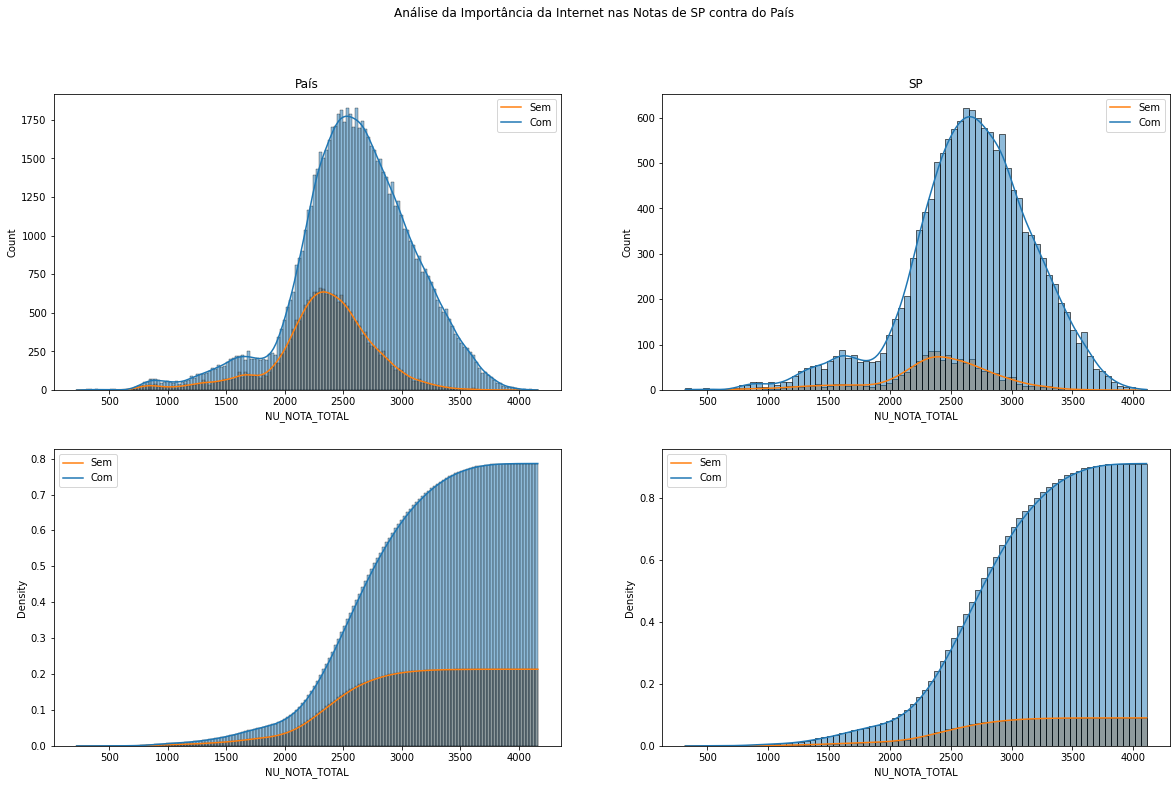

In [385]:
plt.figure(figsize=(20,12))
plt.suptitle("Análise da Importância da Internet nas Notas de SP contra do País")

plt.subplot(2,2,1)
sns.histplot(dados_sem_notas_zero, x = "NU_NOTA_TOTAL", hue="Q025", kde=True)
plt.legend(['Sem', 'Com'])
plt.title("País")

plt.subplot(2,2,2)
sns.histplot(dados_sp, x = "NU_NOTA_TOTAL", hue="Q025", kde=True)
plt.legend(['Sem', 'Com'])
plt.title("SP")

plt.subplot(2,2,3)
sns.histplot(dados_sem_notas_zero, x = "NU_NOTA_TOTAL", hue="Q025", kde=True, stat="density", cumulative=True)
plt.legend(['Sem', 'Com'])

plt.subplot(2,2,4)
sns.histplot(dados_sp, x = "NU_NOTA_TOTAL", hue="Q025", kde=True, stat="density", cumulative=True)
plt.legend(['Sem', 'Com'])

Cerca de 10% das pessoas que realizaram a prova em SP não possuiam internet em casa. Esse número cresce para 20% em todo o país. Até aqui as informações relatam um desenvolvimento social mais avançado em SP comparado ao resto do páis, com notas melhores e menor densidade de pessoas sem acesso a internet.

Text(0.5, 1.0, 'SP')

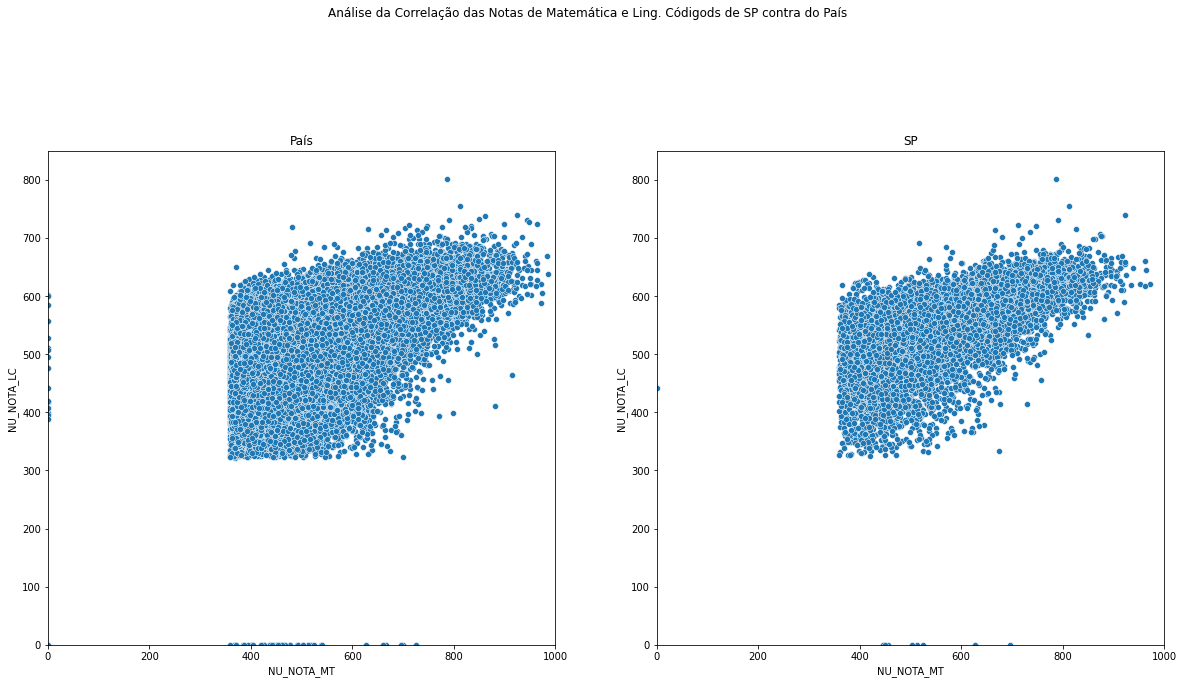

In [387]:
plt.figure(figsize=(20, 20))
plt.suptitle("Análise da Correlação das Notas de Matemática e Ling. Códigods de SP contra do País")

plt.subplot(2,2,1)
sns.scatterplot(data = dados_sem_notas_zero, x="NU_NOTA_MT", y="NU_NOTA_LC")
plt.xlim((0, 1000))
plt.ylim((0, 850))
plt.title("País")

plt.subplot(2,2,2)
sns.scatterplot(data = dados_sp, x="NU_NOTA_MT", y="NU_NOTA_LC")
plt.xlim((0, 1000))
plt.ylim((0, 850))
plt.title("SP")


O Scatterplot mostra pontos mais agrupados no estado de SP, indicando que a correlação entre notas no estado é maior do que no país. Nesse caso porém imagino que o tamanho da amostra possa atrapalhar a análise. Teriamos que ter uma amostra com a mesma população.

Text(0.5, 1.0, 'SP')

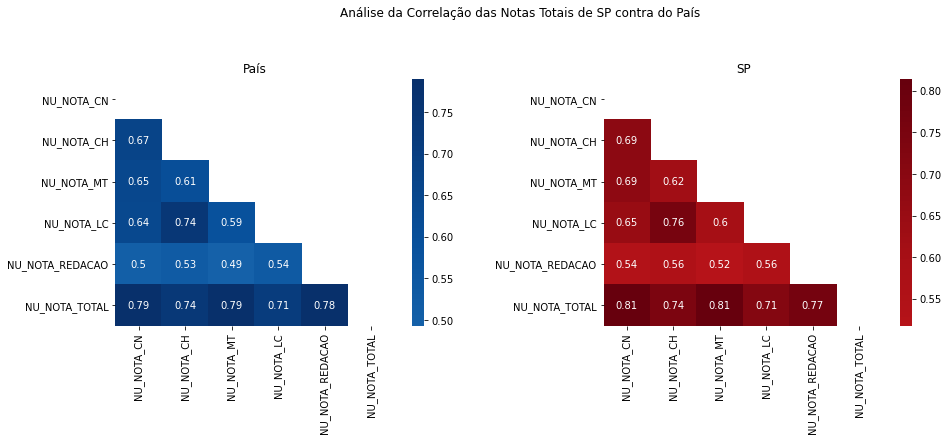

In [289]:
plt.figure(figsize=(15,10))
plt.suptitle("Análise da Correlação das Notas Totais de SP contra do País")
plt.subplots_adjust(wspace=0.4)

plt.subplot(2,2,1)
mask = np.triu(np.ones_like(correlacao, dtype=int))
sns.heatmap(correlacao, mask=mask, cmap="Blues", center=0, annot=True)
plt.title("País")

plt.subplot(2,2,2)
mask = np.triu(np.ones_like(correlacao_sp, dtype=int))
sns.heatmap(correlacao_sp, mask=mask, cmap="Reds", center=0, annot=True)
plt.title("SP")

Confirmando que a correlação entre notas é um pouco maior em SP. Julgando pelo que vimos nos outros gráficos é o esperado. Igualar a população das amostras nos daria uma análise mais confiável.

# **Desafio 4 - O que causa a correlação de MT e LC?**

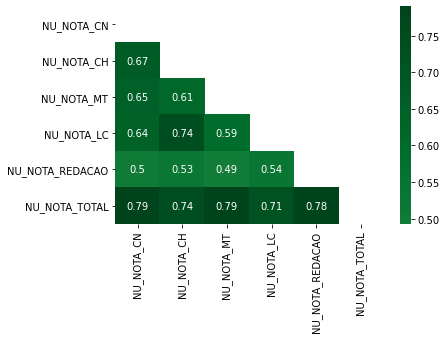

In [355]:
mask = np.triu(np.ones_like(correlacao, dtype=int))
sns.heatmap(correlacao, mask=mask, cmap="Greens", center=0, annot=True)

A correlação MT-LC é a mais próxima de 0 de todas, se excluirmos redação que possui um método de avaliação completamente diferente das demais. Talvez não por coincidência a correlação de matématica se mantém mais fraca com as outras matérias do que das outras entre si. Porém, matemática possui a relação mais alta com a nota total (empatada com ciências naturais). Pode inidicar uma preocupação maior dos estudantes com o conteúdo de matemática para a prova, ou estar relacionado a teoria de que a melhora no raciocínio lógico provido pela estudo da matemática aumenta o desempenho nas outras áreas.